In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.patches import Rectangle

In [2]:
file = 'PBRexp040_StarchSampleInfo_jupyter.xlsx'

In [3]:
data = pd.read_excel(file)
df = pd.DataFrame(data)
df.head(3)

,Tube Label,Sample Collection Date,Sample Collection Time,Offset Time (hours),Reactor Time of Day,Reactor,Ecotype,Cell Count (cells/mL),Total Chlorophyll (µg/mL),% Starch Weight / Cell Weight,Cells per starch sample,Dry Weight Estimate (mg),Starch (mg),Starch per cell (pg)
0,1-1,2016-10-17,10:00:00,0,10:00:00,A1,CC-1009,1325000,NaN,0.004104,66250000,5,0.020520,0.309739
1,1-2,2016-10-17,10:00:00,0,10:00:00,A2,CC-1009,1050000,NaN,0.005031,52500000,5,0.025156,0.479160
2,1-3,2016-10-17,10:00:00,0,10:00:00,A3,CC-1009,1200000,NaN,0.004427,60000000,5,0.022137,0.368948


In [4]:
measurement_list = ['Starch per cell (pg)']

metadata_columns = ['Ecotype', 'Reactor Time of Day']
df_sub = pd.DataFrame(columns=metadata_columns+measurement_list)

for line in list(df['Ecotype'].unique()):
      for timepoint in sorted(list(df['Reactor Time of Day'].unique())):
            
            # create row for each ecotype and timepoint
            new_row_label = len(df_sub.index)
            df_sub.loc[new_row_label, metadata_columns]=[line, timepoint]
            
            df_line = df.loc[(df['Ecotype'] == line) & (df['Reactor Time of Day'] == timepoint), :]

            
            for measurement in measurement_list:
                
                df_sub.loc[new_row_label, measurement]=df_line[measurement].values
            
df_sub.head()

,Ecotype,Reactor Time of Day,Starch per cell (pg)
0,CC-1009,00:00:00,"[2.1244542474279764, 1.3234261687353166, 2.062..."
1,CC-1009,06:00:00,"[0.37645540739889305, 0.3908670031874182, 0.26..."
2,CC-1009,08:00:00,"[0.12859596001015858, 0.1886008873534273, 0.27..."
3,CC-1009,10:00:00,"[0.30973850338732245, 0.4791598593722696, 0.36..."
4,CC-1009,12:00:00,"[0.7794881765377802, 0.7587711075541242, 0.604..."


In [5]:
stat_list = ['count', 'avg', 'std_dev']
df_sub['daylight_int'] = np.nan

for new_col in stat_list:
    df_sub[new_col] = np.nan

df_sub[stat_list] = [[len(values), values.mean(), values.std()] for values in df_sub['Starch per cell (pg)']]

df_sub['daylight'] = [(dt.datetime.combine(dt.date(2, 2, 2), my_time) -
                       dt.timedelta(hours=6)).time() for my_time in df_sub['Reactor Time of Day']]

for i in range(len(df_sub.index)):
    df_sub['daylight_int'][i] = df_sub['daylight'][i].hour
    
df_sub.sort_values(by=['Ecotype','daylight_int'], inplace=True)
    
df_sub.head()

<ipython-input-5-7c7b1561a004>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['daylight_int'][i] = df_sub['daylight'][i].hour


,Ecotype,Reactor Time of Day,Starch per cell (pg),daylight_int,count,avg,std_dev,daylight
1,CC-1009,06:00:00,"[0.37645540739889305, 0.3908670031874182, 0.26...",0.0,3,0.343422,0.057210,00:00:00
2,CC-1009,08:00:00,"[0.12859596001015858, 0.1886008873534273, 0.27...",2.0,6,0.477256,0.312075,02:00:00
3,CC-1009,10:00:00,"[0.30973850338732245, 0.4791598593722696, 0.36...",4.0,3,0.385949,0.070203,04:00:00
4,CC-1009,12:00:00,"[0.7794881765377802, 0.7587711075541242, 0.604...",6.0,3,0.714147,0.078216,06:00:00
5,CC-1009,14:00:00,"[3.1324503454184844, 1.4166141499181477, 0.796...",8.0,6,2.160101,1.071771,08:00:00


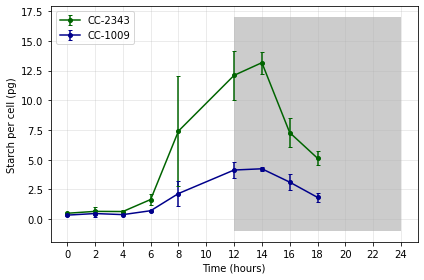

In [6]:
ecotype_colors = {
    "CC-2343": "darkgreen",
    "CC-1009": "darkblue"
}

fig, ax = plt.subplots(figsize=(6,4))

for line in set(df_sub['Ecotype']):

    values = df_sub.loc[df_sub['Ecotype'] == line, ['daylight_int', 'avg', 'std_dev']]
    
    plt.errorbar(values['daylight_int'], values['avg'], yerr=values['std_dev'], label=line,
                 marker='o', markersize=4, capsize=2, color=ecotype_colors[line])


ax.add_patch(Rectangle((12, -1), width=12, height=18, angle=0.0, alpha=0.2, facecolor='black'))

plt.xlabel('Time (hours)')
plt.ylabel('Starch per cell (pg)')

plt.xticks(np.arange(0, 25, step=2))

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('starch.jpg',dpi=1000)